# Proyecto de Reconocimiento de Patrones
# Reconocimiento de jugadores
### Integrantes:
- ## Acosta Imandt Daniel
 - ## Castillo del Valle Pablo David
- ## Garduño Martinez Eduardo

# Procesamiento

In [ ]:
!pip install yellowbrick

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#Importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from scipy.spatial import distance_matrix
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [ ]:
#Importar el archivo csv y vemos los registros (#dataset de entrenamiento)
dataframe = pd.read_csv("players_20.csv")
dataframe['player_positions']=dataframe['player_positions'].str.split(',').str[0]
dataframe

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [ ]:
DeepnoteChart(dataframe, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

In [ ]:
#Seleccionamos los atributos que nos interesan
atributos = ['long_name',
 'player_positions',
 #'overall',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'value_eur']

jugadores = dataframe[atributos]
#LLamamos los df de los otros años
fifa15 = pd.read_csv('/work/players_15.csv')
fifa16 = pd.read_csv('/work/players_16.csv')
fifa17 = pd.read_csv('/work/players_17.csv')
fifa18 = pd.read_csv('/work/players_18.csv')
fifa19 = pd.read_csv('/work/players_19.csv')
fifa20 = pd.read_csv('/work/players_20.csv')

# Limpiamos datos
fifa15['mentality_composure'] = fifa15['overall']
fifa15 = fifa15[atributos]
fifa16['mentality_composure'] = fifa16['overall']
fifa16 = fifa16[atributos]
fifa17 = fifa17[atributos]
fifa18 = fifa18[atributos]
fifa19 = fifa19[atributos]
fifa20 = fifa20[atributos]
fifa20 = fifa20.loc[(fifa20["player_positions"] != 'GK') & (fifa20["player_positions"] != 'SUB') & (fifa20["player_positions"] != 'RES')]
fifa20 = fifa20.dropna()

In [ ]:
#limpiamos más datos
jugadores = jugadores.loc[(jugadores["player_positions"] != 'GK') & (jugadores["player_positions"] != 'SUB') & (jugadores["player_positions"] != 'RES')]
jugadores = jugadores.dropna()
X_jugadores = jugadores.iloc[:,2:-1].values
y_jugadores = jugadores.iloc[:,1].values

In [ ]:
#Realizamos los clusters de acuerdo a las posiciones
for j,v in enumerate(y_jugadores):
    if v == 'RF' or v == 'RM' or v == 'LF' or v == 'LM' or v == 'RW' or v == 'LW' or v == 'CAM' or v == 'LAM' or v == 'RAM' or v == 'ST' or v == 'LS' or v == 'RS' or v == 'CF':
        y_jugadores[j] = 'Attacker'

    elif v == 'RCM' or v=='LCM' or v == 'CDM' or v == 'LDM' or v == 'RDM' or v == 'CM':
        y_jugadores[j] = 'Midfielder'

    elif v == 'LWB' or v == 'RWB' or v == 'LB' or v == 'RB':
        y_jugadores[j] = 'Lateral Defender'

    elif v == 'RBC' or v == 'LCB' or v == 'CB':
        y_jugadores[j] = 'Central Defender'

# Modelos

## PCA y Modelos (Jugadores)

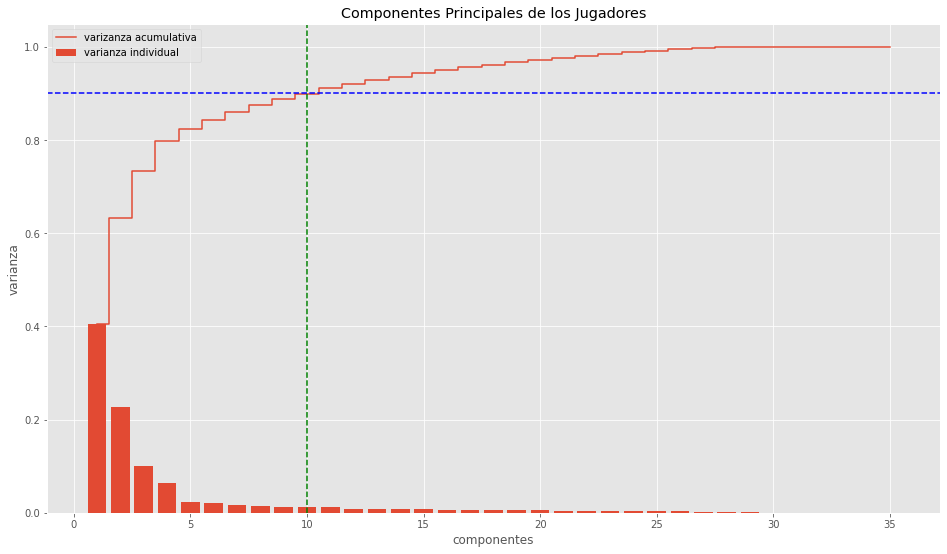

In [ ]:
#Graficamos la varianza de las componentes principales para decidir cuantas usar

#Estandarizamos
sc = StandardScaler()
X_jugadores_std = sc.fit_transform(X_jugadores)

#Sacamos Matriz de Covarianza
cov_mat = np.cov(X_jugadores_std.T)

#Sacamos eigenvalores e eigenvectores de la matriz de covarianza
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)

#Ordenamos los eigenvalores de acuerdo a su magnitud
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#Creamos la grafica de la varianza de las componentes principales
plt.bar(range(1,36),var_exp, label="varianza individual", align = "center")
plt.step(range(1,36), cum_var_exp, where="mid", label="varizanza acumulativa")
plt.axhline(y=0.9,color='blue', linestyle='--')
plt.axvline(x=10,color='green', linestyle='--')
plt.xlabel("componentes")
plt.ylabel("varianza")
plt.title("Componentes Principales de los Jugadores")
plt.legend(loc = "best")
plt.show()

In [ ]:
#Creamos el objeto de las componentes principales e indicamos que queremos 10
pca = PCA(n_components=10)

#Transformamos las caracteristicas de los jugadores
X_jugadores_pca = pca.fit_transform(X_jugadores_std)

#Separamos nuestro conjunto en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_jugadores_pca,y_jugadores,test_size = 0.3,random_state=3)

In [ ]:
#Creamos el objeto de los k-vecinos con los parametros
kvecinos = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,weights='distance')

#Entrenamos el modelo
kvecinos.fit(X_train,y_train)

#Realizamos predicciones sobre el conjunto de prueba
y_predict =  kvecinos.predict(X_test)

In [ ]:
#Mostramos los scores del modelo
matriz = confusion_matrix(y_test,y_predict)
print("Matriz de confusion")
print(matriz)
print((classification_report(y_test, y_predict)))

Matriz de confusion
[[1848    1   35  110]
 [   0  879   54   55]
 [  16   49  692   86]
 [  99   54   50  845]]
                  precision    recall  f1-score   support

        Attacker       0.94      0.93      0.93      1994
Central Defender       0.89      0.89      0.89       988
Lateral Defender       0.83      0.82      0.83       843
      Midfielder       0.77      0.81      0.79      1048

        accuracy                           0.88      4873
       macro avg       0.86      0.86      0.86      4873
    weighted avg       0.88      0.88      0.88      4873



## PCA y Módelos (Porteros)

In [ ]:
#Seleccionamos solo los atributos de los porteros para verlos por aparte
atributos_portero = ['long_name',
'player_positions',
'overall',
'gk_diving',
'gk_handling',
'gk_kicking',
'gk_reflexes',
'gk_speed',
'gk_positioning',
'value_eur']
porteros = dataframe[atributos_portero]

porteros = porteros.loc[(porteros["player_positions"] == 'GK')]
X_porteros = porteros.iloc[:,3:-1].values
y_porteros = porteros.iloc[:,2].values

In [ ]:
# Sacmos DF de los porteros solamente
fifa15p = pd.read_csv('/work/players_15.csv')
fifa16p = pd.read_csv('/work/players_16.csv')
fifa17p = pd.read_csv('/work/players_17.csv')
fifa18p = pd.read_csv('/work/players_18.csv')
fifa19p = pd.read_csv('/work/players_19.csv')
fifa20p = pd.read_csv('/work/players_20.csv')


fifa15p = fifa15p[atributos_portero]
fifa16p = fifa16p[atributos_portero]
fifa17p = fifa17p[atributos_portero]
fifa18p = fifa18p[atributos_portero]
fifa19p = fifa19p[atributos_portero]
fifa20p = fifa20p[atributos_portero]
fifa20p = fifa20p.loc[(fifa20p["player_positions"] == 'GK')]
fifa20p = fifa20p.dropna()

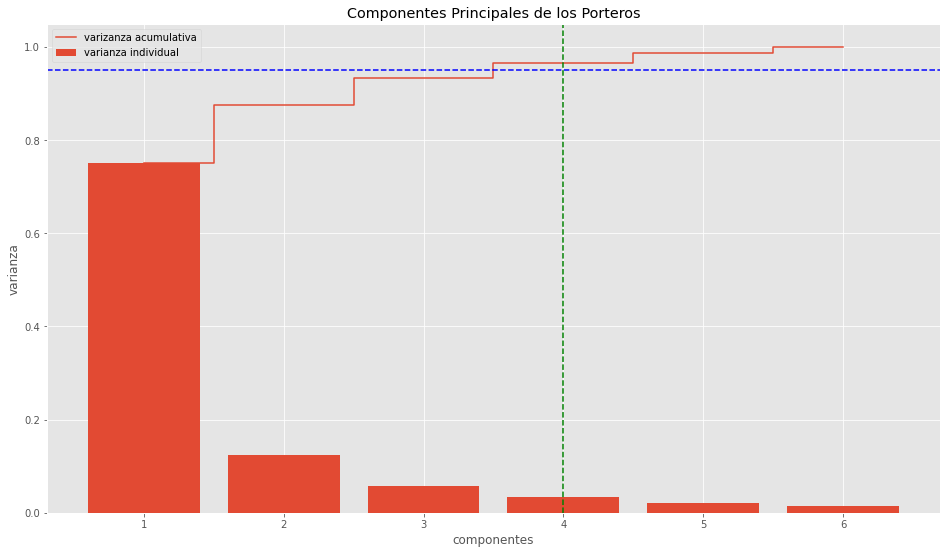

In [ ]:
#Graficamos la varianza de las componentes principales para decidir cuantas usar

#Estandarizamos
scp = StandardScaler()
X_porteros_std = scp.fit_transform(X_porteros)

#Sacamos Matriz de Covarianza
cov_mat = np.cov(X_porteros_std.T)

#Sacamos eigenvalores e eigenvectores de la matriz de covarianza
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)

#Ordenamos los eigenvalores de acuerdo a su magnitud
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]

#Creamos la grafica de la varianza de las componentes principales
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,7),var_exp, label="varianza individual", align = "center")
plt.step(range(1,7), cum_var_exp, where="mid", label="varizanza acumulativa")
plt.axhline(y=0.95,color='blue', linestyle='--')
plt.axvline(x=4,color='green', linestyle='--')
plt.xlabel("componentes")
plt.ylabel("varianza")
plt.title("Componentes Principales de los Porteros")
plt.legend(loc = "best")
plt.show()

In [ ]:
#Agrupamos a los porteros de acuerdo a sus medias
y_porteros
for j,v in enumerate(y_porteros):
    if v > 85:
        y_porteros[j] = 0

    elif v > 80:
        y_porteros[j] = 1
    
    elif v > 75:
        y_porteros[j] = 2
    
    elif v > 70:
        y_porteros[j] = 3
    
    elif v > 65:
        y_porteros[j] = 4
    
    elif v > 60:
        y_porteros[j] = 5
    
    elif v > 55:
        y_porteros[j] = 6

    elif v > 47:
        y_porteros[j] = 7

In [ ]:
#Creamos el objeto de las componentes principales e indicamos que queremos 10
pcap = PCA(n_components=4)

#Transformamos las caracteristicas de los porteros
X_porteros_pca = pcap.fit_transform(X_porteros_std)

#Dividimos nuestro conjunto de porteros en entrenamiento y prueba
X_trainp, X_testp, y_trainp, y_testp = train_test_split(X_porteros_pca,y_porteros,test_size = 0.3,random_state=3)

In [ ]:
#Creamos el modelo y lo entrenamos
kvecinosp = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2,weights='distance')
kvecinosp.fit(X_trainp,y_trainp)

#Realizamos predicciones para evaluar el módelo
y_predictp =  kvecinosp.predict(X_testp)

#Mostramos los scores del modelo
matriz = confusion_matrix(y_testp,y_predictp)
print("Matriz de confusion")
print(matriz)
print((classification_report(y_testp, y_predictp)))

Matriz de confusion
[[  2   2   0   0   0   0   0   0]
 [  0   7   5   0   0   0   0   0]
 [  0   0  29  10   0   0   0   0]
 [  0   0   4  76   9   0   0   0]
 [  0   0   0   6 117  18   0   0]
 [  0   0   0   0  17 125   6   0]
 [  0   0   0   0   0   9  90   5]
 [  0   0   0   0   0   0   7  67]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.78      0.58      0.67        12
           2       0.76      0.74      0.75        39
           3       0.83      0.85      0.84        89
           4       0.82      0.83      0.82       141
           5       0.82      0.84      0.83       148
           6       0.87      0.87      0.87       104
           7       0.93      0.91      0.92        74

    accuracy                           0.84       611
   macro avg       0.85      0.77      0.80       611
weighted avg       0.84      0.84      0.84       611



# Funciones y Consultas

In [ ]:
#Función que te muestra los jugadores mas parecidos de acuerdo a las restricciones
def jugadormcercercano(jugador,precio_euros=105500000,num_jugadores = 5,fifa = 20):
    """
    jugador: Nombre del jugador como aparece en la base de datos
        Tipo: String

    precio_euros: Precio Maximo que debe de tener el jugador para ser considerado en el resultado
        Tipo: Int

    num_jugares: Cantidad de Jugadores Similares que quieres que te regresen
        Tipo: Int
    
    fifa: Selecciona el Fifa del cual quieres seleccionar tu jugador
        Tipo: Int
    """

    #Limpiamos los datos y seleccionamos atributos que nos interesan
    if fifa == 20 or fifa == 19:
        if fifa == 20:
            jugador = fifa20[fifa20['long_name'].str.match(jugador)]
        else:
            jugador = fifa19[fifa19['long_name'].str.match(jugador)]
            #agregar aquí
        
        X_jugador = jugador.iloc[0,2:-1].values.reshape((1,35))
        posiciones = jugador.iloc[0,1]

    else:

        if fifa == 17:
            jugador = fifa17[fifa17['long_name'].str.match(jugador)]
            posiciones = jugador.iloc[0,1]

        elif fifa == 15:
            jugador = fifa15[fifa15['long_name'].str.match(jugador)]
            posiciones = jugador.iloc[0,1]

        elif fifa == 16:
            jugador = fifa16[fifa16['long_name'].str.match(jugador)]
            posiciones = jugador.iloc[0,1]

        elif fifa == 18:
            jugador = fifa18[fifa18['long_name'].str.match(jugador)]
            posiciones = jugador.iloc[0,1]

        else:
            print("No contamos con ese FIFA")
            return False


        jugador = jugador.iloc[0,2:-1].values
        X_jugador = np.zeros((1,35)).astype(int)
        for j,v in enumerate(jugador):
            if type(v) == float:
                X_jugador[0,j] = int(v)

            elif type(v) == str:
                X_jugador[0,j] = v[0:2]
                
            else:
                X_jugador[0,j] = v


    #Estandarizamos los datos
    X_jugador_std = sc.transform(X_jugador)

    #Transformamos los datos a las componentes principales
    X_jugador_pca = pca.transform(X_jugador_std)

    #Calculamos las distancias
    predicciones = np.argsort(distance_matrix(X_jugador_pca,X_jugadores_pca))[0,:]
    resultado = [["Nombre del Jugador","Posiciones","Precio"]]

    #Seleccionamos nombres, posiciones y precio de los jugadores, además metemos solo el número indicado
    for j in predicciones:
        if fifa20.iloc[j,-1] <= precio_euros and fifa20.iloc[j,-1] > 0:
            resultado.append([fifa20.iloc[j,0],fifa20.iloc[j,1],fifa20.iloc[j,-1]])

        if len(resultado) >= num_jugadores+2:
            break

    print("Tu jugador posee esta posiciones " + posiciones)

    return resultado
                            

## Consultas con jugadores

In [ ]:
jugadormcercercano('Luis Alberto Suárez Díaz',105500000,5,17)

Tu jugador posee esta posiciones ST


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Luis Alberto Suárez Díaz', 'ST', 53000000],
 ['Karim Benzema', 'CF, ST', 45000000],
 ['Robert Lewandowski', 'ST', 64500000],
 ['Alexandre Lacazette', 'ST', 46000000],
 ['Harry Kane', 'ST', 83000000],
 ['손흥민 孙兴慜', 'CF, LM', 60000000]]

In [ ]:
jugadormcercercano('Luis Alberto Suárez Díaz',5500000,5,17)

Tu jugador posee esta posiciones ST


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Jefferson Agustín Farfán Guadalupe', 'RM, ST', 4500000],
 ['Lukas Podolski', 'CAM, ST, RW', 3400000],
 ['David Villa Sánchez', 'ST, LW', 4500000],
 ['Ignacio Martín Scocco', 'ST', 4700000],
 ['Rodrigo Sebastián Palacio', 'ST, CAM', 2800000],
 ['Carlos Alberto Tevez', 'CAM, ST', 4500000]]

In [ ]:
jugadormcercercano('Luis Alberto Suárez Díaz',105500000,5,20)

Tu jugador posee esta posiciones ST


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Luis Alberto Suárez Díaz', 'ST', 53000000],
 ['Harry Kane', 'ST', 83000000],
 ['Robert Lewandowski', 'ST', 64500000],
 ['Edinson Roberto Cavani Gómez', 'ST', 47000000],
 ['Kevin Volland', 'ST, RW, LW', 26500000],
 ['Roberto Firmino Barbosa de Oliveira', 'CF, ST, CAM', 52000000]]

In [ ]:
jugadormcercercano('Lionel Andrés Messi Cuccittini',55000000,5)

Tu jugador posee esta posiciones RW, CF, ST


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Ángel Fabián Di María Hernández', 'RW, LW', 39000000],
 ['Ronaldo Jailson Cabrais Petri', 'RW, CAM', 27000000],
 ['Nabil Fekir', 'CAM', 39000000],
 ['Florian Thauvin', 'RW, RM', 30500000],
 ['Lorenzo Insigne', 'CF, LW, ST', 52000000],
 ['Philippe Coutinho Correia', 'LW, CM', 46500000]]

In [ ]:
jugadormcercercano('Cristiano Ronaldo dos Santos Aveiro',55000000,5)

Tu jugador posee esta posiciones ST, LW


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Karim Benzema', 'CF, ST', 45000000],
 ['Alexandre Lacazette', 'ST', 46000000],
 ['Florian Thauvin', 'RW, RM', 30500000],
 ['Memphis Depay', 'CF, LW, CAM', 40500000],
 ['Gareth Frank Bale', 'RW, LW, ST', 37500000],
 ['Luis Alberto Suárez Díaz', 'ST', 53000000]]

In [ ]:
jugadormcercercano('Neymar da Silva Santos Junior',12000000,5)

Tu jugador posee esta posiciones LW, CAM


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Ricardo Andrade Quaresma Bernardo', 'RM, LM', 8000000],
 ['Éder Citadin Martins', 'ST', 10000000],
 ['Claudio Nuno Coíntra Calegari', 'CAM, CF', 4500000],
 ['Ezequiel Iván Lavezzi', 'ST, CAM', 6500000],
 ['Luís Carlos Almeida da Cunha', 'LW, RW', 11500000],
 ['Max-Alain Gradel', 'LW, LM', 11000000]]

In [ ]:
jugadormcercercano('Zlatan Ibrahimović',55000000,5,15)

Tu jugador posee esta posiciones ST


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Karim Benzema', 'CF, ST', 45000000],
 ['Givanildo Vieira de Souza', 'RM, RW, ST', 11500000],
 ['Luis Alberto Suárez Díaz', 'ST', 53000000],
 ['Marko Arnautović', 'ST', 21500000],
 ['Romelu Lukaku', 'ST', 46000000],
 ['Kevin Volland', 'ST, RW, LW', 26500000]]

In [ ]:
jugadormcercercano('Philipp Lahm',55000000,5,15)

Tu jugador posee esta posiciones CDM, RB, CM


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Marco Verratti', 'CM, CDM', 54500000],
 ['Frenkie de Jong', 'CM, CDM', 52000000],
 ['Alejandro Grimaldo García', 'LB', 29500000],
 ['Juan Bernat Velasco', 'LB, LM', 16000000],
 ['Trent Alexander-Arnold', 'RB', 32000000],
 ['Welington Kauê Dano Nascimento', 'LB, LM', 10500000]]

In [ ]:
jugadormcercercano('Sergio Ramos García',55000000,5,15)

Tu jugador posee esta posiciones CB


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Samuel Umtiti', 'CB', 50000000],
 ['Yuri Berchiche Izeta', 'LB', 10500000],
 ['Nathan Aké', 'CB', 17500000],
 ['Sergio Ramos García', 'CB', 31500000],
 ['Victor Nilsson Lindelöf', 'CB', 22000000],
 ['Łukasz Piszczek', 'RB', 6000000]]

In [ ]:
jugadormcercercano('Xavier Hernández Creus',55000000,5,15)

Tu jugador posee esta posiciones CM


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Francisco Román Alarcón Suárez', 'CAM, CM, LW', 51000000],
 ['David Josué Jiménez Silva', 'CAM, CM', 36000000],
 ['Santiago Cazorla González', 'CM, CDM, LM', 11000000],
 ['Hakan Çalhanoğlu', 'LW, CAM, CM', 17500000],
 ['Thiago Alcântara do Nascimento', 'CM, CAM, CDM', 50000000],
 ['Mario Götze', 'CF, CAM, CM', 26000000]]

In [ ]:
jugadormcercercano('Samir Nasri',55000000,5,15)

Tu jugador posee esta posiciones LM, RM


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Riyad Mahrez', 'RW, RM', 31500000],
 ['Adem Ljajić', 'CAM, LW', 20500000],
 ['Marco Asensio Willemsen', 'LW, RW', 34000000],
 ['Jesús Joaquín Fernández Sáez', 'RW, CF', 27000000],
 ['Osvaldo Nicolás Fabián Gaitán', 'CAM', 15500000],
 ['Diego Perotti', 'LW', 14000000]]

In [ ]:
jugadormcercercano('Wayne Mark Rooney',55000000,5,15)

Tu jugador posee esta posiciones ST, CF, CAM


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Luis Alberto Suárez Díaz', 'ST', 53000000],
 ['Kevin Volland', 'ST, RW, LW', 26500000],
 ['Givanildo Vieira de Souza', 'RM, RW, ST', 11500000],
 ['Karim Benzema', 'CF, ST', 45000000],
 ['Marko Arnautović', 'ST', 21500000],
 ['Roberto Firmino Barbosa de Oliveira', 'CF, ST, CAM', 52000000]]

In [ ]:
jugadormcercercano('John Terry',55000000,5,16)

Tu jugador posee esta posiciones CB


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['José Miguel da Rocha Fonte', 'CB', 5500000],
 ['Andreas Granqvist', 'CB', 3800000],
 ['Gary Cahill', 'CB', 4200000],
 ['Dimitrios Siovas', 'CB', 6000000],
 ['Shane Duffy', 'CB', 11000000],
 ['James Tomkins', 'CB', 8500000]]

In [ ]:
jugadormcercercano('Marcelo Vieira da Silva Júnior',55000000,5,17)

Tu jugador posee esta posiciones LB


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Alex Sandro Lobo Silva', 'LB, LM', 33000000],
 ['Kwadwo Asamoah', 'LB', 10000000],
 ['Lucas Digne', 'LB', 28500000],
 ['Senad Lulić', 'LM', 7500000],
 ['Marcelo Vieira da Silva Júnior', 'LB', 28000000],
 ['Ricardo Barbosa Pereira', 'RB, RM', 23500000]]

In [ ]:
jugadormcercercano('Sergio Busquets i Burgos',55000000,5,17)

Tu jugador posee esta posiciones CDM


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Sergio Busquets i Burgos', 'CDM, CM', 55000000],
 ['William Silva de Carvalho', 'CDM, CM', 27500000],
 ['Jack Cork', 'CM', 7000000],
 ['Iván Marcone', 'CDM, CM', 12500000],
 ['Manuel Alejandro García Sánchez', 'CM, CDM', 6000000],
 ['Daniel García Carrillo', 'CM, CDM', 17000000]]

In [ ]:
jugadormcercercano('Kevin De Bruyne',1000000,5,16)

Tu jugador posee esta posiciones CAM, LM, RM


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['염기훈 廉基勋', 'LW, CAM', 600000],
 ['Marcos Álvarez', 'CF, ST, CAM', 1000000],
 ['Florian Martin', 'CM, LM', 850000],
 ['James Henry', 'CAM, CM', 850000],
 ['Enzo Diogo Merques Gomes', 'LB', 875000],
 ['George Nyiko Maluleka', 'CM, CAM', 975000]]

## Consultas con porteros

In [ ]:
#Función que te muestra a los porteros mas parecidos de acuerdo a las restricciones
def porteromcercercano(jugador,precio_euros = 105500000,num_jugadores = 5,fifa = 20):
    """
    jugador: Nombre del jugador como aparece en la base de datos
        Tipo: String

    num_jugares: Cantidad de Jugadores Similares que quieres que te regresen
        Tipo: Int
    
    fifa: Selecciona el Fifa del cual quieres seleccionar tu jugador
        Tipo: Int
    """

    #Limpiamos los datos y seleccionamos atributos que nos interesan
    if fifa == 20 or fifa == 19:
        if fifa == 20:
            jugador = fifa20p[fifa20p['long_name'].str.match(jugador)]
        else:
            jugador = fifa19p[fifa19p['long_name'].str.match(jugador)]
        
        X_jugador = jugador.iloc[0,3:-1].values.reshape((1,6))
        posiciones = jugador.iloc[0,1]

    else:

        if fifa == 17:
            jugador = fifa17p[fifa17p['long_name'].str.match(jugador)][atributos_portero]
            posiciones = jugador.iloc[0,1]

        elif fifa == 15:
            jugador = fifa15p[fifa15p['long_name'].str.match(jugador)][atributos_portero]
            posiciones = jugador.iloc[0,1]

        elif fifa == 16:
            jugador = fifa16p[fifa16p['long_name'].str.match(jugador)][atributos_portero]
            posiciones = jugador.iloc[0,1]

        elif fifa == 18:
            jugador = fifa18p[fifa18p['long_name'].str.match(jugador)][atributos_portero]
            posiciones = jugador.iloc[0,1]

        else:
            print("No contamos con ese FIFA")
            return False


        jugador = jugador.iloc[0,3:-1].values
        X_jugador = np.zeros((1,6)).astype(int)
        for j,v in enumerate(jugador):
            if type(v) == float:
                X_jugador[0,j] = int(v)

            elif type(v) == str:
                X_jugador[0,j] = v[0:2]
                
            else:
                X_jugador[0,j] = v

    #Estandarizamos los datos
    X_jugador_std = scp.transform(X_jugador)

    #Transformamos los datos a las componentes principales
    X_jugador_pca = pcap.transform(X_jugador_std)

    #Calculamos las distancias
    predicciones = np.argsort(distance_matrix(X_jugador_pca,X_porteros_pca))[0,:]
    resultado = [["Nombre del Jugador","Posiciones","Precio"]]

    #Seleccionamos nombres, posiciones y precio de los jugadores, además metemos solo el número indicado
    for j in predicciones:
        if porteros.iloc[j,-1] <= precio_euros and porteros.iloc[j,-1] > 0:
            resultado.append([porteros.iloc[j,0],porteros.iloc[j,1],porteros.iloc[j,-1]])

        if len(resultado) >= num_jugadores+2:
            break

    print("Tu jugador posee esta posiciones " + posiciones)

    return resultado

## Consultas

In [ ]:
porteromcercercano('Jan Oblak',25000000,5,20)

Tu jugador posee esta posiciones GK


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Stéphane Ruffier', 'GK', 19000000],
 ['Yann Sommer', 'GK', 21000000],
 ['Jasper Cillessen', 'GK', 20000000],
 ['Salvatore Sirigu', 'GK', 19000000],
 ['Rune  Almenning Jarstein', 'GK', 11500000],
 ['Sergio  Asenjo Andrés', 'GK', 17000000]]

In [ ]:
porteromcercercano('Jan Oblak',105500000,5,20)

Tu jugador posee esta posiciones GK


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Jan Oblak', 'GK', 77500000],
 ['Thibaut Courtois', 'GK', 48000000],
 ['Alisson Ramses Becker', 'GK', 58000000],
 ['Samir Handanovič', 'GK', 26000000],
 ['David De Gea Quintana', 'GK', 56000000],
 ['Péter Gulácsi', 'GK', 31000000]]

In [ ]:
porteromcercercano('Thibaut Courtois',105500000,5,15)

Tu jugador posee esta posiciones GK


[['Nombre del Jugador', 'Posiciones', 'Precio'],
 ['Thibaut Courtois', 'GK', 48000000],
 ['Samir Handanovič', 'GK', 26000000],
 ['Wojciech  Szczęsny', 'GK', 37500000],
 ['Łukasz Fabiański', 'GK', 9500000],
 ['Stéphane Ruffier', 'GK', 19000000],
 ['Roman Bürki', 'GK', 32000000]]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1b69a523-420e-469d-9b69-888f43f9f734' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>